In [2]:
#Importing libraries
import numpy as np
import pandas as pd

# Visualizaion libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Model bulding libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

In [5]:
# Uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving housing_price_dataset.csv to housing_price_dataset.csv


In [6]:
# Reading the .csv file
df = pd.read_csv("housing_price_dataset.csv")

# About Data Set

In [7]:
# Checking the dimensionality of the dataset
df.shape

(50000, 6)

In [8]:
# Checking the first 5 rows of the dataset
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [9]:
# Displaying the last 5 rows of the dataset
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


# Data Preprocessing

## Feature Engineering

In [10]:
# Creating a house age column
current_year = 2024
df['Age'] = current_year - df['YearBuilt']

# Creating a Avg SqFt per bedroom column
df['SqFt_per_Bedroom'] = df['SquareFeet'] / df['Bedrooms']

# Creating a Avg SqFt per bathroom column
df['SqFt_per_Bathroom'] = df['SquareFeet'] / df['Bathrooms']

# Creating a total rooms column
df['TotalRooms'] = df['Bedrooms'] + df['Bathrooms']

# Creating price per SqFt column
df['PricePerSqFt'] = df['Price'] / df['SquareFeet']

# Displaying the first 5 rows of the dataset after generating new features
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Age,SqFt_per_Bedroom,SqFt_per_Bathroom,TotalRooms,PricePerSqFt
0,2126,4,1,Rural,1969,215355.283618,55,531.500000,2126.0,5,101.295994
1,2459,3,2,Rural,1980,195014.221626,44,819.666667,1229.5,5,79.306312
2,1860,2,1,Suburb,1970,306891.012076,54,930.000000,1860.0,3,164.995168
3,2294,2,1,Urban,1996,206786.787153,28,1147.000000,2294.0,3,90.142453
4,2130,5,2,Suburb,2001,272436.239065,23,426.000000,1065.0,7,127.904338


In [11]:
# Checking the dimensionality of the dataset after doing feature engineering
df.shape

(50000, 11)

### One-Hot Encoding

In [12]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
Neighborhood	 = encoder.fit_transform(df[['Neighborhood']])

# Convert the encoded features into a DataFrame
Neighborhood	 = pd.DataFrame(Neighborhood	, columns=encoder.get_feature_names_out(['Neighborhood']))

# Concatenate the encoded features with the original dataframe
df = pd.concat([df.drop(columns=['Neighborhood']), Neighborhood	], axis=1)

# Check the final DataFrame
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Age,SqFt_per_Bedroom,SqFt_per_Bathroom,TotalRooms,PricePerSqFt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,55,531.500000,2126.0,5,101.295994,1.0,0.0,0.0
1,2459,3,2,1980,195014.221626,44,819.666667,1229.5,5,79.306312,1.0,0.0,0.0
2,1860,2,1,1970,306891.012076,54,930.000000,1860.0,3,164.995168,0.0,1.0,0.0
3,2294,2,1,1996,206786.787153,28,1147.000000,2294.0,3,90.142453,0.0,0.0,1.0
4,2130,5,2,2001,272436.239065,23,426.000000,1065.0,7,127.904338,0.0,1.0,0.0


In [13]:
# Checking the dimensionality of the dataset after doing one-hot encoding
df.shape

(50000, 13)

## Data Cleaning

### Handling Duplicates

In [14]:
# Checking whether there are any duplicates in the dataset
df.duplicated().sum()

0

### Handling Missing Values

In [15]:
# Checking the number of null values in each column
df.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
YearBuilt,0
Price,0
Age,0
SqFt_per_Bedroom,0
SqFt_per_Bathroom,0
TotalRooms,0
PricePerSqFt,0


### Detecting Outliers

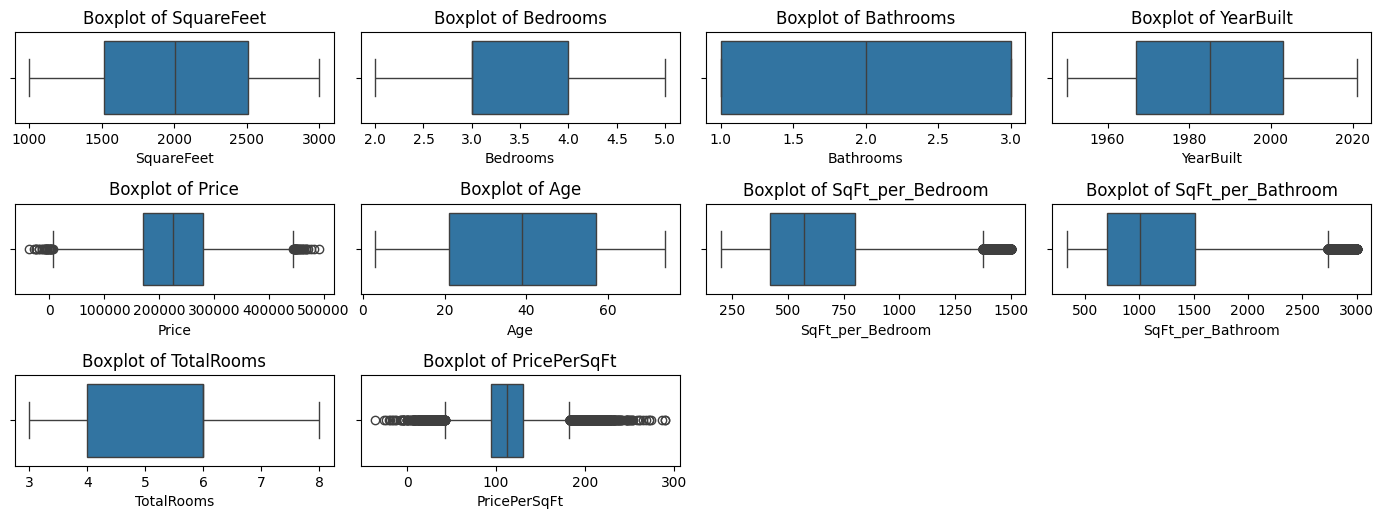

Number of outliers in SquareFeet: 0
Number of outliers in Bedrooms: 0
Number of outliers in Bathrooms: 0
Number of outliers in YearBuilt: 0
Number of outliers in Price: 59
Number of outliers in Age: 0
Number of outliers in SqFt_per_Bedroom: 1616
Number of outliers in SqFt_per_Bathroom: 2268
Number of outliers in TotalRooms: 0
Number of outliers in PricePerSqFt: 1368


In [16]:
# Generating boxplots for only the numerical variables
# Removed 'Neighborhood' from numerical_variables as it's a categorical variable
numerical_variables = ['SquareFeet','Bedrooms','Bathrooms', 'YearBuilt', 'Price', 'Age', 'SqFt_per_Bedroom', 'SqFt_per_Bathroom', 'TotalRooms','PricePerSqFt']  # Exclude 'Neighborhood'

plt.figure(figsize=(14, 10))

for i, column in enumerate(numerical_variables, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Calculating the IQR for numerical variables to find any outliers
for column in numerical_variables:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = (df[column] < lower_bound) | (df[column] > upper_bound)

    print(f"Number of outliers in {column}: {len(df[outliers_iqr])}")

Clipping Outliers

<Figure size 1400x1000 with 0 Axes>

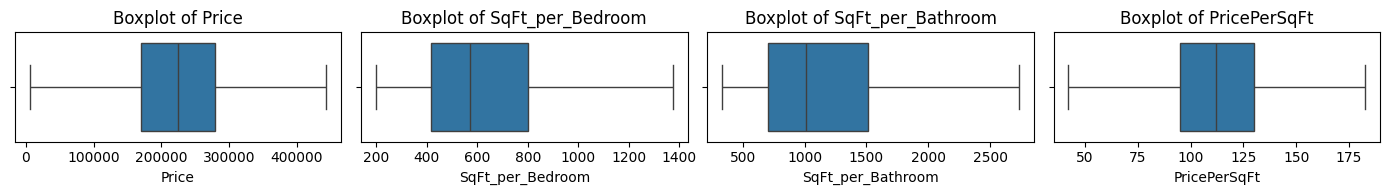

Number of outliers after clipping in Price: 0
Number of outliers after clipping in SqFt_per_Bedroom: 0
Number of outliers after clipping in SqFt_per_Bathroom: 0
Number of outliers after clipping in PricePerSqFt: 0


In [17]:
# Clipping the outliers
outlier_columns = [ 'Price', 'SqFt_per_Bedroom', 'SqFt_per_Bathroom', 'PricePerSqFt']
plt.figure(figsize=(14, 10))

for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Generating boxplots for numerical variables after clipping
plt.figure(figsize=(14, 10))

for i, column in enumerate(outlier_columns, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Calculating the IQR for the numerical variables to find any outliers after clipping
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"Number of outliers after clipping in {column}: {len(df[outliers_iqr])}")

# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [18]:
# Displaying descriptive statistics for numerical variables only

numeric_desc = df[['SquareFeet','Bedrooms','Bathrooms','YearBuilt','Price','Age','SqFt_per_Bedroom','SqFt_per_Bathroom','TotalRooms','PricePerSqFt']].describe()
print(numeric_desc)

         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price  \
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000   
mean    2006.374680      3.498700      1.995420   1985.404420  224827.106430   
std      575.513241      1.116326      0.815851     20.719377   76090.390682   
min     1000.000000      2.000000      1.000000   1950.000000    5829.205484   
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225   
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141166   
75%     2506.000000      4.000000      3.000000   2003.000000  279373.630052   
max     2999.000000      5.000000      3.000000   2021.000000  443500.284793   

                Age  SqFt_per_Bedroom  SqFt_per_Bathroom    TotalRooms  \
count  50000.000000      50000.000000       50000.000000  50000.000000   
mean      38.595580        641.813647        1223.204273      5.494120   
std       20.719377        296.033779         675.961544 

In [19]:
# Computing variance for numerical variables in the dataset
variance = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price', 'Age', 'SqFt_per_Bedroom', 'SqFt_per_Bathroom',  'TotalRooms','PricePerSqFt']].var()

print("\nVariance:")
print(variance)


Variance:
SquareFeet           3.312155e+05
Bedrooms             1.246183e+00
Bathrooms            6.656123e-01
YearBuilt            4.292926e+02
Price                5.789748e+09
Age                  4.292926e+02
SqFt_per_Bedroom     8.763600e+04
SqFt_per_Bathroom    4.569240e+05
TotalRooms           1.925284e+00
PricePerSqFt         7.810685e+02
dtype: float64


## Visualizations

### Scatter plot

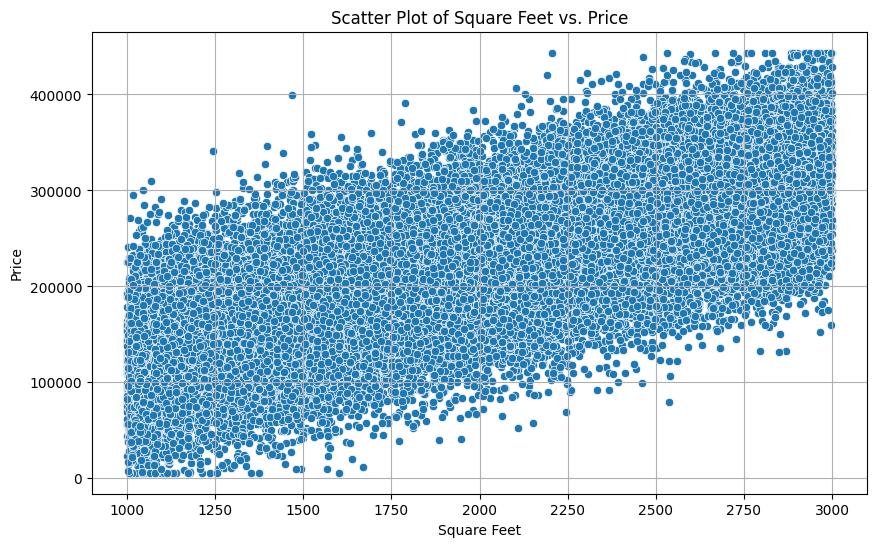

In [20]:
# Plotting a scatter plot of square feet vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFeet', y='Price', data=df)
plt.title('Scatter Plot of Square Feet vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Correlation Matrix Heatmap

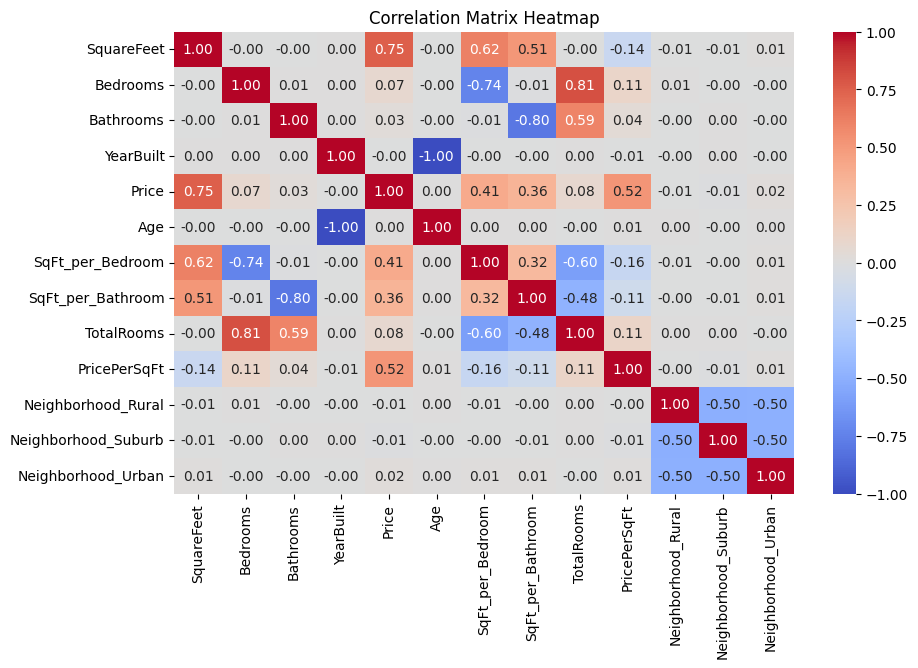

In [21]:
# Plotting a Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Histogram

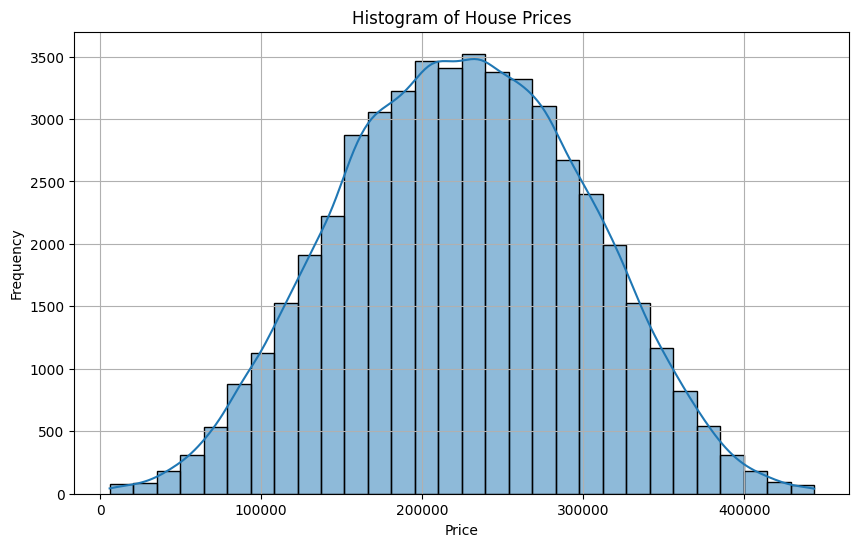

In [22]:
# Plotting a histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Pair plot

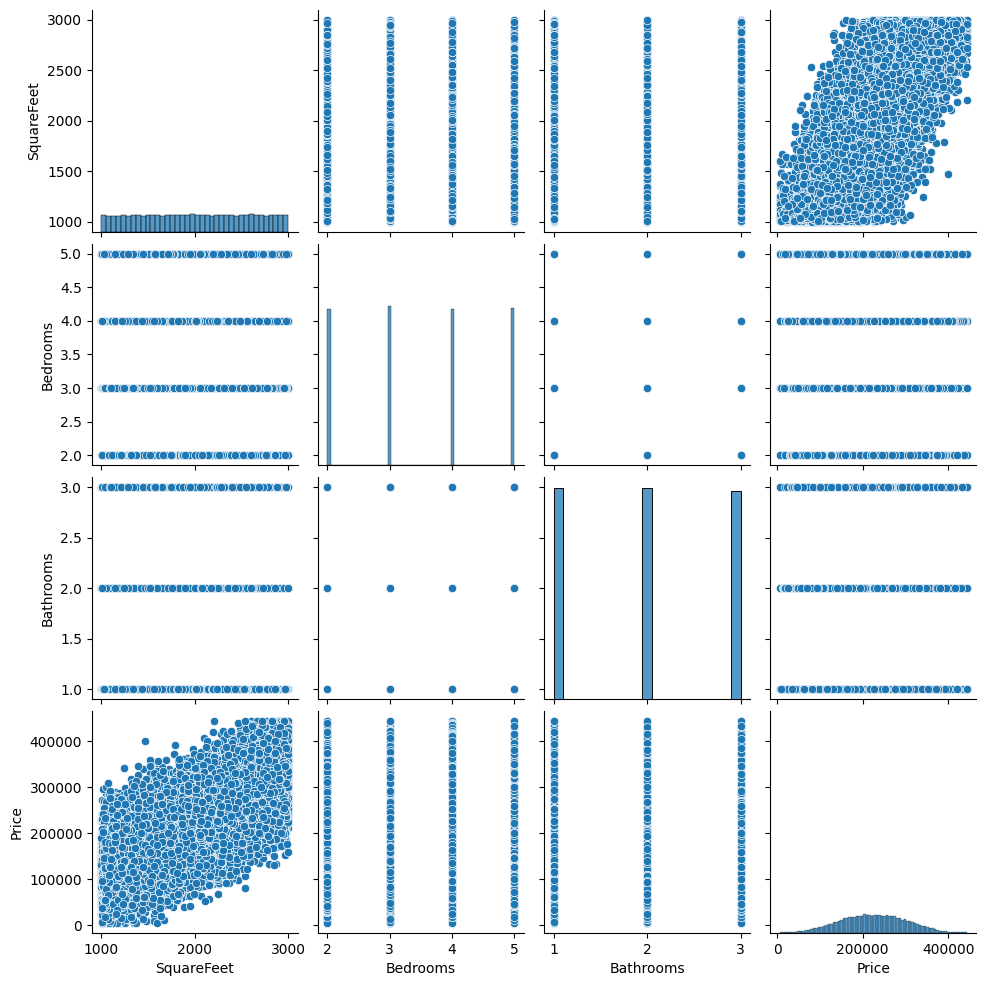

In [23]:
# Creating a pair plot to visualize the relationships between SquareFeet, Bedrooms, Bathrooms, and Price
sns.pairplot(df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Price']])
plt.show()

# Model Building

### Standard Scaling

In [24]:
# Creating columns_to_scale to contain the columns to scale
columns_to_scale = ['SquareFeet','Bedrooms','Bathrooms', 'YearBuilt', 'Price', 'Age', 'SqFt_per_Bedroom', 'SqFt_per_Bathroom', 'TotalRooms','PricePerSqFt' ]

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Age,SqFt_per_Bedroom,SqFt_per_Bathroom,TotalRooms,PricePerSqFt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,0.207861,0.449067,-1.220113,-0.791751,-0.124482,0.791751,-0.372642,1.335586,-0.356114,-0.422106,1.0,0.0,0.0
1,0.786480,-0.446738,0.005614,-0.260842,-0.391813,0.260842,0.600792,0.009314,-0.356114,-1.208932,1.0,0.0,0.0
2,-0.254340,-1.342543,-1.220113,-0.743486,1.078516,0.743486,0.973501,0.942069,-1.797522,1.857152,0.0,1.0,0.0
3,0.499777,-1.342543,-1.220113,0.511390,-0.237093,-0.511390,1.706533,1.584123,-1.797522,-0.821198,0.0,0.0,1.0
4,0.214811,1.344872,0.005614,0.752713,0.625698,-0.752713,-0.729024,-0.234046,1.085294,0.529983,0.0,1.0,0.0


## Data Splitting

In [25]:
# Splitting all the variables into features(x) and target variables(y)
X = df.drop(columns=['Price'])  # Features (excluding the target variable 'Price')
Y = df['Price']  # Target variable

In [26]:
# Displaying the dimensionality of features
X.shape

(50000, 12)

In [27]:
# Displaying the dimensionality of target variables
Y.shape

(50000,)

In [28]:
# Splitting the dataset into Training Set & Testing Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [29]:
# Displaying the dimentionality of each training and testing set

print("Dimentionality of X Training Set: ", X_train.shape)
print("Dimentionality of Y Training Set: ", Y_train.shape)
print("Dimentionality of X Testing Set: ", X_test.shape)
print("Dimentionality of Y Testing Set: ", Y_test.shape)

Dimentionality of X Training Set:  (35000, 12)
Dimentionality of Y Training Set:  (35000,)
Dimentionality of X Testing Set:  (15000, 12)
Dimentionality of Y Testing Set:  (15000,)


## Model Training and Evaluation

### Multiple Linear Regression

In [30]:
# Creating and fitting the Multiple Linear Regression model
model_mlr = LinearRegression()
model_mlr.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_mlr = model_mlr.predict(X_test)

# Evaluating the model
mse_mlr = mean_squared_error(Y_test, y_pred_mlr)
r2_mlr = r2_score(Y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
mae_mlr = mean_absolute_error(Y_test, y_pred_mlr)

# Printing the performance metrics
print("Multiple Linear Regression")
print("Mean squared error:", mse_mlr)
print("R-squared:", r2_mlr)
print("RMSE:", rmse_mlr)
print("MAE:", mae_mlr)

Multiple Linear Regression
Mean squared error: 0.03514557328424839
R-squared: 0.9647574464903876
RMSE: 0.18747152659603641
MAE: 0.13535295122279326


### Ridge Regression

In [31]:
# Creating and fitting the Ridge Regression model
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_ridge = model_ridge.predict(X_test)

# Evaluating the model
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)

# Printing the performance metrics
print("\nRidge Regression")
print("Mean squared error:", mse_ridge)
print("R-squared:", r2_ridge)
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)


Ridge Regression
Mean squared error: 0.0351452482990537
R-squared: 0.9647577723723421
RMSE: 0.1874706598352225
MAE: 0.13535148480603681


### Random Forest Regressor

In [32]:
# Creating and fitting the Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(Y_test, y_pred_rf)

# Printing the performance metrics
print("\nRandom Forest Regressor")
print("Mean squared error:", mse_rf)
print("R-squared:", r2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)


Random Forest Regressor
Mean squared error: 0.0016012574031744383
R-squared: 0.9983943241085406
RMSE: 0.04001571445288011
MAE: 0.010200919342326758


### Support Vector Regressor

In [33]:
# Creating and fitting the Support Vector Regressor model
model_svr = SVR()
model_svr.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_svr = model_svr.predict(X_test)

# Evaluating the model
mse_svr = mean_squared_error(Y_test, y_pred_svr)
r2_svr = r2_score(Y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(Y_test, y_pred_svr)

# Printing the performance metrics
print("\nSupport Vector Regressor")
print("Mean squared error:", mse_svr)
print("R-squared:", r2_svr)
print("RMSE:", rmse_svr)
print("MAE:", mae_svr)


Support Vector Regressor
Mean squared error: 0.004057441761863052
R-squared: 0.9959313621875481
RMSE: 0.06369805147618765
MAE: 0.04550319291638037


### Gradient Boosting Regressor

In [34]:
# Creating and fitting the Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_gb = model_gb.predict(X_test)

# Evaluating the model
mse_gb = mean_squared_error(Y_test, y_pred_gb)
r2_gb = r2_score(Y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(Y_test, y_pred_gb)

# Printing the performance metrics
print("\nGradient Boosting Regressor")
print("Mean squared error:", mse_gb)
print("R-squared:", r2_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)


Gradient Boosting Regressor
Mean squared error: 0.0027211171958556684
R-squared: 0.9972713741897091
RMSE: 0.0521643287683803
MAE: 0.03348183734663438


Model Perfromance Summary

In [35]:
# Define the models and their performance metrics
models = {
    'Multiple Linear Regression': {
        'MSE': mse_mlr,
        'R-squared': r2_mlr,
        'RMSE': rmse_mlr,
        'MAE': mae_mlr
    },
    'Ridge Regression': {
        'MSE': mse_ridge,
        'R-squared': r2_ridge,
        'RMSE': rmse_ridge,
        'MAE': mae_ridge
    },
    'Random Forest Regression': {
        'MSE': mse_rf,
        'R-squared': r2_rf,
        'RMSE': rmse_rf,
        'MAE': mae_rf
    },
    'Support Vector Regressor': {
        'MSE': mse_svr,
        'R-squared': r2_svr,
        'RMSE': rmse_svr,
        'MAE': mae_svr
    },
    'Gradient Boosting Regressor': {
        'MSE': mse_gb,
        'R-squared': r2_gb,
        'RMSE': rmse_gb,
        'MAE': mae_gb
    }
}

# Create a DataFrame from the dictionary
model_metrics = pd.DataFrame.from_dict(models, orient='index')

# Print the summary table
print("Performance Metrics Summary:")
print(model_metrics)

Performance Metrics Summary:
                                  MSE  R-squared      RMSE       MAE
Multiple Linear Regression   0.035146   0.964757  0.187472  0.135353
Ridge Regression             0.035145   0.964758  0.187471  0.135351
Random Forest Regression     0.001601   0.998394  0.040016  0.010201
Support Vector Regressor     0.004057   0.995931  0.063698  0.045503
Gradient Boosting Regressor  0.002721   0.997271  0.052164  0.033482


# Model Optimization

## Hyperparameter Tuning

### Random Forest Regressor

In [36]:
# Defining hyperparameter grid
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4]
}

# Creating the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)

# Fitting the model with grid search
grid_search_rf.fit(X_train, Y_train)

# Best hyperparameters for Random Forest Regression
best_params_rf = grid_search_rf.best_params_

# Updated Random Forest Regression model with best hyperparameters
best_model_rf = grid_search_rf.best_estimator_

# Making predictions with the best model
y_pred_rf = best_model_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(Y_test, y_pred_rf)

print("\nPerformance Scores After Hyperparameter Tuning for Random Forest Regression:")
print("MSE:", mse_rf)
print("R-squared:", r2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)


Performance Scores After Hyperparameter Tuning for Random Forest Regression:
MSE: 0.0014652445357519839
R-squared: 0.9985307122880522
RMSE: 0.03827851271603932
MAE: 0.010073521647741099


## Cross-Validation

### Random Forest Regressor

In [37]:
# Define the number of folds for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the Random Forest Regressor model
model_rf = RandomForestRegressor()

# Perform K-fold cross-validation for each metric
cv_results_mse_rf = cross_val_score(model_rf, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')
cv_results_r2_rf = cross_val_score(model_rf, X_train, Y_train, cv=kf, scoring='r2')
cv_results_mae_rf = cross_val_score(model_rf, X_train, Y_train, cv=kf, scoring='neg_mean_absolute_error')

# Converting negative values to positive for MSE and MAE
cv_results_mse_rf = -cv_results_mse_rf
cv_results_mae_rf = -cv_results_mae_rf

# Calculate RMSE from the average MSE
rmse_rf = np.sqrt(np.mean(cv_results_mse_rf))

# Print the average results across all folds for Random Forest Regressor
print("Random Forest Regressor:")
print("Mean squared error across folds:", np.mean(cv_results_mse_rf))
print("Root Mean Squared Error (RMSE) across folds:", rmse_rf)
print("R-squared across folds:", np.mean(cv_results_r2_rf))
print("Mean Absolute Error (MAE) across folds:", np.mean(cv_results_mae_rf))

Random Forest Regressor:
Mean squared error across folds: 0.0019057236693154987
Root Mean Squared Error (RMSE) across folds: 0.043654595053848555
R-squared across folds: 0.998092429224782
Mean Absolute Error (MAE) across folds: 0.011175678076874996
